<a href="https://colab.research.google.com/github/djhsgfjk/collab/blob/main/Lab_3_%D0%A0%D0%B5%D0%B0%D0%BB%D0%B8%D0%B7%D0%BE%D0%B2%D0%B0%D1%82%D1%8C_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%9A%D1%8D%D0%BD%D0%BD%D0%B8_%D0%B4%D0%BB%D1%8F_%D0%B4%D0%B5%D1%82%D0%B5%D0%BA%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_%D0%B3%D1%80%D0%B0%D0%BD%D0%B8%D1%86_%D0%BD%D0%B0_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from PIL import Image
from pylab import *
import random as rd

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

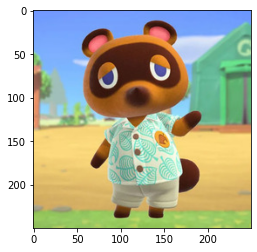

In [4]:
image = np.array(Image.open('/AnimalCrossing.jpg'), dtype=int)
figure()
imshow(image)
show()

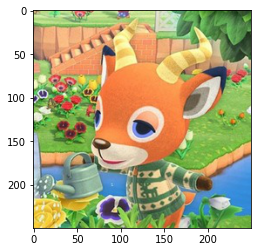

In [5]:
image2 = np.array(Image.open('/AnimalCrossing2.jpg'), dtype=int)
figure()
imshow(image2)
show()

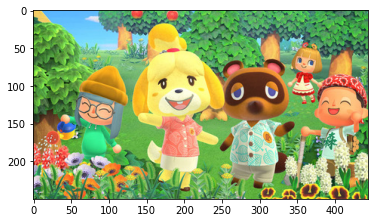

In [6]:
image3 = np.array(Image.open('/AnimalCrossing3.jpg'), dtype=int)
figure()
imshow(image3)
show()

0. Перевести изображение в полутоновое

In [7]:
def make_halftone_image(image):
  width = image.shape[0]
  height = image.shape[1]

  halftoneImage = np.zeros(width*height, dtype=int)
  halftoneImage.shape = (width, height)
  for i in range(width):
      for j in range(height):
          halftoneImage[i][j] = mean(image[i,j,:])
  
  return halftoneImage

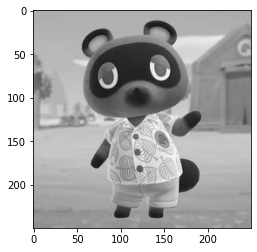

In [8]:
halftoneImage = make_halftone_image(image)
figure()
imshow(halftoneImage, cmap='gray', vmin=0, vmax=255)
show()

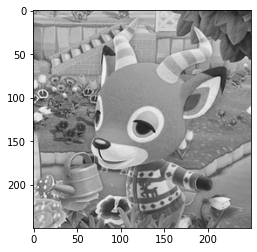

In [9]:
halftoneImage2 = make_halftone_image(image2)
figure()
imshow(halftoneImage2, cmap='gray', vmin=0, vmax=255)
show()

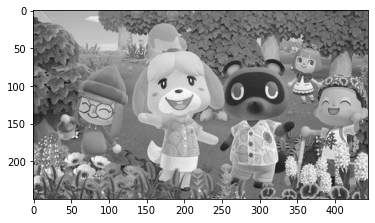

In [10]:
halftoneImage3 = make_halftone_image(image3)
figure()
imshow(halftoneImage3, cmap='gray', vmin=0, vmax=255)
show()

1. Размыть изображение фильтром Гаусса с небольшой дисперсией

In [11]:
def build_G(sigma2):
  const1 = 2*sigma2
  const2 = 2*np.pi*sigma2

  G = np.zeros(9, dtype=np.float64)
  G.shape = (3, 3)

  for i in range(3):
    for j in range(3):
      G[i, j] = np.power(np.e, -((i-3//2)**2 + (j-3//2)**2)/const1)/const2

  G /= np.sum(G)
  return G   

def Gaussian_filtering(image, sigma2):
  G = build_G(sigma2)

  width = image.shape[0]
  height = image.shape[1]

  gaussImage = np.zeros(width*height, dtype=int)
  gaussImage.shape = (width, height)

  imageCopy = np.zeros((width+1)*(height+1), dtype=int)
  imageCopy.shape = ((width+1),(height+1))


  for i in range(width):
      for j in range(height):
        imageCopy[i+1, j+1] = image[i, j]

  for i in range(1, width-1):
      for j in range(1, height-1):
        gaussImage[i, j] = np.sum(G * imageCopy[i-1:i+2, j-1:j+2])

  gaussImage = clip(gaussImage, 0, 255)     
  return gaussImage

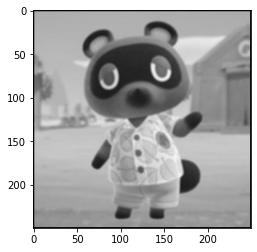

In [12]:
gaussImage = Gaussian_filtering(halftoneImage, 100)
figure()
imshow(gaussImage, cmap='gray', vmin=0, vmax=255)

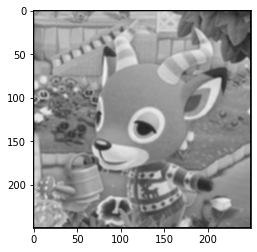

In [13]:
gaussImage2 = Gaussian_filtering(halftoneImage2, 100)
figure()
imshow(gaussImage2, cmap='gray', vmin=0, vmax=255)

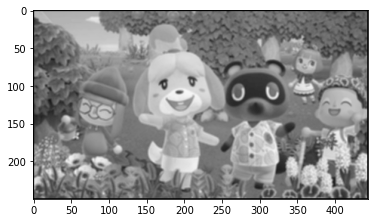

In [14]:
gaussImage3 = Gaussian_filtering(halftoneImage3, 100)
figure()
imshow(gaussImage3, cmap='gray', vmin=0, vmax=255)

2. Вычислить градиент изображения с помощью фильтра Собеля

In [15]:
def get_gradient(image):
  width = image.shape[0]
  height = image.shape[1]

  imageCopy = np.zeros((width+1, height+1), dtype=int)

  for i in range(width):
    for j in range(height):
      imageCopy[i+1, j+1] = image[i, j]

  gradient = np.zeros((width+1, height+1, 2), dtype=float)

  for i in range(1, width):
    for j in range(1, height):
      gradient[i, j, 0] = (2*imageCopy[i+1, j]-2*imageCopy[i-1, j] + imageCopy[i+1, j-1]-imageCopy[i-1, j-1] + imageCopy[i+1, j+1]-imageCopy[i-1, j+1])/6
      gradient[i, j, 1] = (2*imageCopy[i, j+1]-2*imageCopy[i, j-1] + imageCopy[i-1, j+1]-imageCopy[i-1, j-1] + imageCopy[i+1, j+1]-imageCopy[i+1, j-1])/6

  return gradient[1:width+1, 1:height+1, :]

In [16]:
gradient = get_gradient(gaussImage)
print(gradient)

[[[  12.66666667   12.66666667]
  [  44.33333333   19.        ]
  [  69.66666667    6.33333333]
  ...
  [  74.66666667    0.        ]
  [  56.          -18.66666667]
  [   0.            0.        ]]

 [[  19.           44.33333333]
  [  66.5          66.5       ]
  [ 104.5          22.16666667]
  ...
  [ 112.66666667    0.        ]
  [  84.5         -65.5       ]
  [   0.            0.        ]]

 [[   6.33333333   69.66666667]
  [  22.33333333  104.66666667]
  [  35.33333333   35.        ]
  ...
  [  38.            0.        ]
  [  28.5        -103.16666667]
  [   0.            0.        ]]

 ...

 [[  -0.16666667   62.16666667]
  [  -0.66666667   93.33333333]
  [  -1.16666667   31.5       ]
  ...
  [  -0.83333333    0.16666667]
  [  -0.33333333  -96.        ]
  [   0.            0.        ]]

 [[ -15.5          46.5       ]
  [ -54.33333333   69.66666667]
  [ -85.5          23.5       ]
  ...
  [ -96.33333333    0.33333333]
  [ -72.33333333  -71.66666667]
  [   0.            0.      

In [17]:
gradient2 = get_gradient(gaussImage2)
print(gradient2)

[[[  13.33333333   13.33333333]
  [  46.           19.33333333]
  [  69.16666667    3.83333333]
  ...
  [  24.16666667    0.16666667]
  [  18.33333333   -6.        ]
  [   0.            0.        ]]

 [[  19.66666667   46.33333333]
  [  68.5          67.83333333]
  [ 103.83333333   13.83333333]
  ...
  [  36.33333333    0.66666667]
  [  27.66666667  -21.        ]
  [   0.            0.        ]]

 [[   5.16666667   71.16666667]
  [  18.83333333  105.5       ]
  [  30.           22.66666667]
  ...
  [  13.            1.33333333]
  [  10.16666667  -33.16666667]
  [   0.            0.        ]]

 ...

 [[  -0.16666667   79.16666667]
  [  -0.16666667  117.16666667]
  [   1.           36.        ]
  ...
  [   1.33333333   -1.33333333]
  [   0.66666667  -74.33333333]
  [   0.            0.        ]]

 [[ -19.83333333   59.16666667]
  [ -69.           88.        ]
  [-107.33333333   28.        ]
  ...
  [ -74.66666667   -1.33333333]
  [ -55.66666667  -56.        ]
  [   0.            0.      

In [18]:
gradient3 = get_gradient(gaussImage3)
print(gradient3)

[[[ 13.5         13.5       ]
  [ 47.16666667  20.16666667]
  [ 74.           6.66666667]
  ...
  [ 36.5         -1.16666667]
  [ 26.5         -8.83333333]
  [  0.           0.        ]]

 [[ 20.16666667  47.16666667]
  [ 70.5         70.5       ]
  [110.83333333  23.5       ]
  ...
  [ 60.          -4.        ]
  [ 43.66666667 -32.33333333]
  [  0.           0.        ]]

 [[  6.66666667  74.        ]
  [ 23.33333333 110.66666667]
  [ 36.83333333  37.16666667]
  ...
  [ 31.16666667  -6.16666667]
  [ 22.66666667 -55.        ]
  [  0.           0.        ]]

 ...

 [[ -0.33333333  47.33333333]
  [ -1.33333333  72.66666667]
  [ -2.16666667  21.16666667]
  ...
  [ -3.5         20.83333333]
  [  3.33333333 -90.33333333]
  [  0.           0.        ]]

 [[-11.5         35.5       ]
  [-40.83333333  54.16666667]
  [-64.16666667  15.5       ]
  ...
  [-87.33333333  20.33333333]
  [-70.5        -66.16666667]
  [  0.           0.        ]]

 [[  0.           0.        ]
  [  0.           0.    

3. Вычислить магнитуду и направление градиента

In [19]:
def get_magn(gradient):
  width = gradient.shape[0]
  height = gradient.shape[1]

  magn = np.zeros((width, height), dtype=float)
  for i in range(width):
    for j in range(height):
      magn[i, j] = np.sqrt(gradient[i, j, 0]**2 + gradient[i, j, 1]**2)

  return magn

In [20]:
magn = get_magn(gradient)
print(magn)

[[ 17.91337179  48.23322967  69.95395311 ...  74.66666667  59.02918299
    0.        ]
 [ 48.23322967  94.0452019  106.82514269 ... 112.66666667 106.91351645
    0.        ]
 [ 69.95395311 107.02284284  49.73373548 ...  38.         107.03088858
    0.        ]
 ...
 [ 62.16689008  93.33571426  31.52159753 ...   0.84983659  96.0005787
    0.        ]
 [ 49.01530373  88.3490552   88.67073925 ...  96.33391003 101.8244677
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]


In [21]:
magn2 = get_magn(gradient2)
print(magn2)

[[ 18.85618083  49.89767307  69.27281012 ...  24.16724137  19.29018173
    0.        ]
 [ 50.33443707  96.40337707 104.75076239 ...  36.33944903  34.73390914
    0.        ]
 [ 71.35396898 107.16783307  37.60023641 ...  13.06819719  34.68989606
    0.        ]
 ...
 [ 79.16684211 117.16678521  36.01388621 ...   1.88561808  74.33632281
    0.        ]
 [ 62.40236819 111.82575732 110.92540036 ...  74.67857048  78.96060903
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]


In [22]:
magn3 = get_magn(gradient3)
print(magn3)

[[ 19.09188309  51.29706511  74.29969343 ...  36.5186406   27.93345266
    0.        ]
 [ 51.29706511  99.70205615 113.29729819 ...  60.13318551  54.33435582
    0.        ]
 [ 74.29969343 113.09975931  52.32643267 ...  31.77088115  59.4876271
    0.        ]
 ...
 [ 47.33450703  72.67889805  21.27727008 ...  21.12528764  90.39481303
    0.        ]
 [ 37.31621631  67.83353808  66.01220426 ...  89.66914495  96.68649222
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]


In [23]:
def get_dir(gradient):
  width = gradient.shape[0]
  height = gradient.shape[1]
  
  dir = np.zeros((width, height), dtype=float)

  for i in range(width):
    for j in range(height):
      if gradient[i, j, 1] == 0:
        dir[i, j] = 0
      elif gradient[i, j, 0] == 0:
        dir[i, j] = np.pi / 2
      else:
        dir[i, j] = np.arctan(gradient[i, j, 1] / gradient[i, j, 0])

  return dir

In [24]:
dir = get_dir(gradient)
print(dir)

[[ 0.78539816  0.40489179  0.09065989 ...  0.         -0.32175055
   0.        ]
 [ 1.16590454  0.78539816  0.20902294 ...  0.         -0.65940248
   0.        ]
 [ 1.48013644  1.36057313  0.78065886 ...  0.         -1.3012665
   0.        ]
 ...
 [-1.56811537 -1.56365359 -1.53377621 ... -0.19739556  1.56732412
   0.        ]
 [-1.24904577 -0.90842953 -0.26823029 ... -0.00346019  0.78076857
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [25]:
dir2 = get_dir(gradient2)
print(dir2)

[[ 0.78539816  0.39787436  0.05536505 ...  0.00689644 -0.31628613
   0.        ]
 [ 1.16938279  0.78050823  0.13244639 ...  0.01834657 -0.6492592
   0.        ]
 [ 1.49832394  1.39414215  0.64704719 ...  0.10220672 -1.27335709
   0.        ]
 ...
 [-1.56869107 -1.56937385  1.54302569 ... -0.78539816 -1.56182796
   0.        ]
 [-1.24735658 -0.90583161 -0.25518239 ...  0.01785525  0.78838323
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [26]:
dir3 = get_dir(gradient3)
print(dir3)

[[ 0.78539816  0.40403854  0.08984754 ... -0.03195259 -0.32175055
   0.        ]
 [ 1.16675778  0.78539816  0.20893573 ... -0.06656816 -0.63736622
   0.        ]
 [ 1.48094879  1.36299652  0.78990264 ... -0.19533795 -1.1798845
   0.        ]
 ...
 [-1.56375419 -1.55244976 -1.46878941 ... -1.40435063 -1.53391269
   0.        ]
 [-1.25752015 -0.92483822 -0.23701802 ... -0.22874925  0.75370147
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


4. Округлить направление градиента до 8 направлений (0, 45, 90, 135, 180, 225, 270, 315)

In [27]:
def round_up(dir):
  new_dir = np.zeros_like(dir, dtype=int)

  dir = (dir * 180 / np.pi) % 360
  for i in range(dir.shape[0]):
    for j in range(dir.shape[1]):
      if dir[i, j] != 0:
        a = dir[i, j] // 45
        b = (dir[i, j] % 45) // 22.5
        new_dir[i, j] = (a+b)*45 % 360
  return new_dir

In [28]:
round_up_dir = round_up(dir)
print(round_up_dir)

[[ 45  45   0 ...   0   0   0]
 [ 45  45   0 ...   0 315   0]
 [ 90  90  45 ...   0 270   0]
 ...
 [270 270 270 ...   0  90   0]
 [270 315   0 ...   0  45   0]
 [  0   0   0 ...   0   0   0]]


In [29]:
round_up_dir2 = round_up(dir2)
print(round_up_dir2)

[[ 45  45   0 ...   0   0   0]
 [ 45  45   0 ...   0 315   0]
 [ 90  90  45 ...   0 270   0]
 ...
 [270 270  90 ... 315 270   0]
 [270 315   0 ...   0  45   0]
 [  0   0   0 ...   0   0   0]]


In [30]:
round_up_dir3 = round_up(dir3)
print(round_up_dir3)

[[ 45  45   0 ...   0   0   0]
 [ 45  45   0 ...   0 315   0]
 [ 90  90  45 ...   0 270   0]
 ...
 [270 270 270 ... 270 270   0]
 [270 315   0 ...   0  45   0]
 [  0   0   0 ...   0   0   0]]


5. Применить процедуру подавление немаксимумов вдоль направления градиентов

In [31]:
def non_maximum_suppression(magn, dir):
  w = gradient.shape[0]
  h = gradient.shape[1]

  max = magn.max()

  magnCopy = np.ones((w+2, h+2), dtype=float)
  magnCopy *= max
  for i in range(1, w+1):
    for j in range(1, h+1):
      magnCopy[i, j] = magn[i-1, j-1]

  non_max = magn.copy()

  for i in range(1, w+1):
    for j in range(1, h+1):
      for k, x, y in [[0, 0, 1], [45, 1, 1], [90, 1, 0], [135, -1, 1]]:
        if dir[i-1, j-1] % 180 == k:
          if magnCopy[i, j] <= magnCopy[i+x, j+y] and magnCopy[i, j] <= magnCopy[i-x, j-y]:
            non_max[i-1, j-1] = 0
  
  return non_max    

In [32]:
non_max = non_maximum_suppression(magn, round_up_dir)
print(non_max.min(), non_max.max())
print(non_max)

0.0 133.16760533670006
[[  0.           0.          69.95395311 ...  74.66666667  59.02918299
    0.        ]
 [  0.          94.0452019  106.82514269 ... 112.66666667 106.91351645
    0.        ]
 [ 69.95395311 107.02284284  49.73373548 ...   0.         107.03088858
    0.        ]
 ...
 [ 62.16689008  93.33571426   0.         ...   0.           0.
    0.        ]
 [ 49.01530373  88.3490552   88.67073925 ...   0.         101.8244677
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]


In [33]:
non_max2 = non_maximum_suppression(magn2, round_up_dir2)
print(non_max2.min(), non_max2.max())
print(non_max2)

0.0 153.17763834479524
[[  0.           0.          69.27281012 ...  24.16724137  19.29018173
    0.        ]
 [  0.          96.40337707 104.75076239 ...  36.33944903  34.73390914
    0.        ]
 [ 71.35396898 107.16783307  37.60023641 ...  13.06819719   0.
    0.        ]
 ...
 [ 79.16684211 117.16678521  36.01388621 ...   0.          74.33632281
    0.        ]
 [ 62.40236819 111.82575732   0.         ...   0.          78.96060903
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]


In [34]:
non_max3 = non_maximum_suppression(magn3, round_up_dir3)
print(non_max3.min(), non_max3.max())
print(non_max3)

0.0 155.1774969367516
[[  0.           0.          74.29969343 ...  36.5186406   27.93345266
    0.        ]
 [  0.          99.70205615 113.29729819 ...  60.13318551  54.33435582
    0.        ]
 [ 74.29969343 113.09975931  52.32643267 ...  31.77088115  59.4876271
    0.        ]
 ...
 [ 47.33450703  72.67889805   0.         ...  21.12528764  90.39481303
    0.        ]
 [ 37.31621631  67.83353808   0.         ...  89.66914495  96.68649222
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]


6. Применить процедуру гистерезиса (уточнения границ) на основе 2-х границ

In [80]:
def hysteresis(magn, min, max):
  w = gradient.shape[0]
  h = gradient.shape[1]

  magnCopy = np.zeros((w+2, h+2), dtype=float)
  for i in range(1, w+1):
    for j in range(1, h+1):
      magnCopy[i, j] = magn[i-1, j-1]

  hyst = np.ones((w+2, h+2), dtype=int) * 3
  hyst[1:w+1, 1:h+1] -= 4

  next = []


  def cycle(i, j):
    for x, y in np.argwhere(hyst[i-1:i+2, j-1:j+2] <= 0):
      if magnCopy[x, y] > min:
        print("cycle", i, j, hyst[x, y], x, y)
        hyst[x, y] = 2
        next.append([x, y])
      else:
        hyst[x, y] = 1


  i, j = np.argwhere(magnCopy[:, :] > max)[0]   
  #print(i, j)
  hyst[i, j] = 2
  cycle(i, j)

  while hyst.min() == -1:
    if len(next) > 0:
      for i, j in next:
        print("next", i, j)
        if magnCopy[i, j] > max:
          hyst[i, j] = 2
          cycle(i, j)
        else:
          hyst[i, j] = 0
      print(next)
      next.clear()
    else:
      i, j = np.argwhere(hyst[1:w+1, 1:h+1] == -1)[0]
      print(i, j)
      if magnCopy[i, j] > max:
        hyst[i, j] = 2
        cycle(i, j)
      else:
        hyst[i, j] = 0
  
  return hyst[1:w+1, 1:h+1] // 2

In [36]:
import sys
print(sys.getrecursionlimit())

sys.setrecursionlimit(10000)

1000


In [81]:
hyst = hysteresis(non_max, 5, 20) * 255
figure()
imshow(hyst, cmap='gray', vmin=0, vmax=255)

cycle 1 3 -1 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2
cycle 2 2 2 2 2
next 2 2

KeyboardInterrupt: ignored

In [ ]:
hyst2 = hysteresis(non_max2, 20, 30) * 255
figure()
imshow(hyst2, cmap='gray', vmin=0, vmax=255)